# Bike Sharing Assignement

## Problem Statement

BoomBikes company needs to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

# Step1 :Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
bike = pd.read_csv('data/day.csv')
print(bike.head())
print(bike.shape) # Observation rows = 730, columns = 16 

# check for null if any
print(bike.info()) # Observation No null object found

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(730, 16)
<class 'pandas.c

## Data cleaning

In [4]:
print(bike.columns) #

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [5]:
# Dropping un-wanted columns
# instant - It represent index, not represent any feature
# dteday - already month and year extracted and represented
# casual and registered - count is directly derived by adding this
# saving all this into new datafram, so that we can add some features if required

bike_sharing = pd.DataFrame()
selected_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']
bike_sharing = bike[selected_columns].copy()
bike_sharing.head()
print(bike_sharing.shape) # Observation shape reduced to 730, 12

(730, 12)


In [6]:
# Replace the catergorical data > 2 label (season,mnth,weekday,weathersit).readable while building the model
# Replace label for season

# Define a mapping for the 'season' replacement
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
# Replace values in the 'season' column using the mapping
bike_sharing['season'] = bike_sharing['season'].replace(season_mapping)

# Define a mapping for the 'mnth' replacement
month_mapping = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}
# Replace values in the 'mnth' column using the mapping
bike_sharing['mnth'] = bike_sharing['mnth'].replace(month_mapping)

# Define a mapping for the 'weekday' replacement
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',    
}
# Replace values in the 'weekday' column using the mapping
bike_sharing['weekday'] = bike_sharing['weekday'].replace(weekday_mapping)

# Define a mapping for the 'weathersit' replacement
weathersit_mapping = {1:'clear', 2:'mist', 3:'light', 4:'heavy'}
# Replace values in the 'weathersit' column using the mapping
bike_sharing['weathersit'] = bike_sharing['weathersit'].replace(weathersit_mapping)

bike_sharing.head()
bike_sharing.info()
bike_sharing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualizing the Data

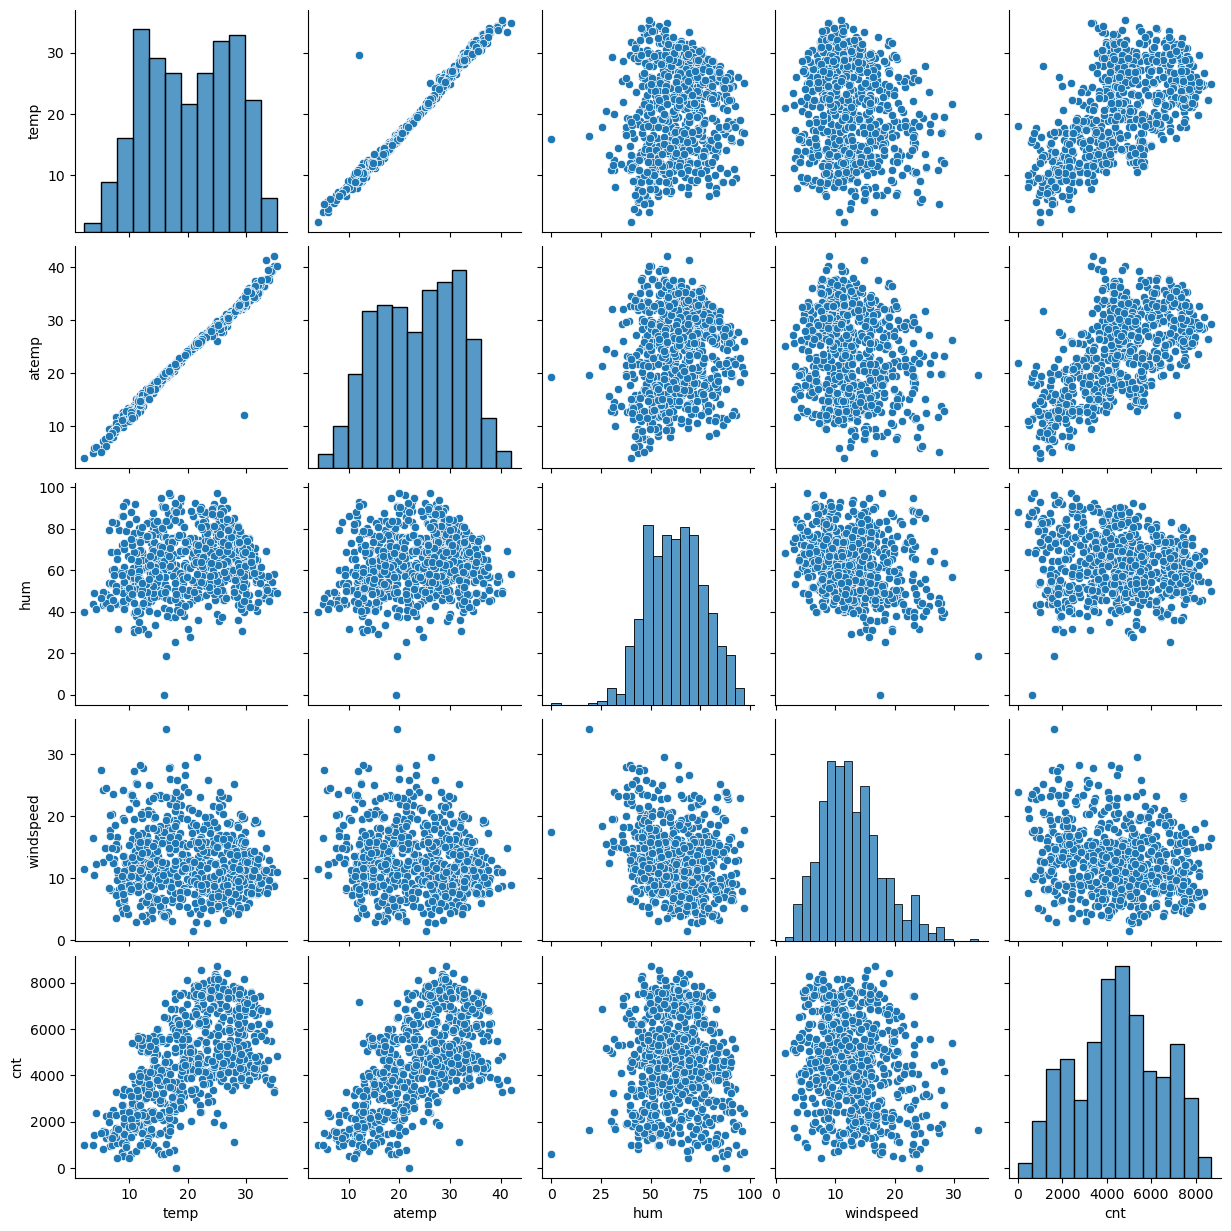

In [7]:
# Analyze Numerical variable
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

sns.pairplot(bike_sharing[num_vars])
plt.show() # Observation - cnt is the target variable. could able to see linear relation of count with temp and atemp. so
           # so it makes sense to apply linear regression model to this problem.

### Visualizing the categorical data

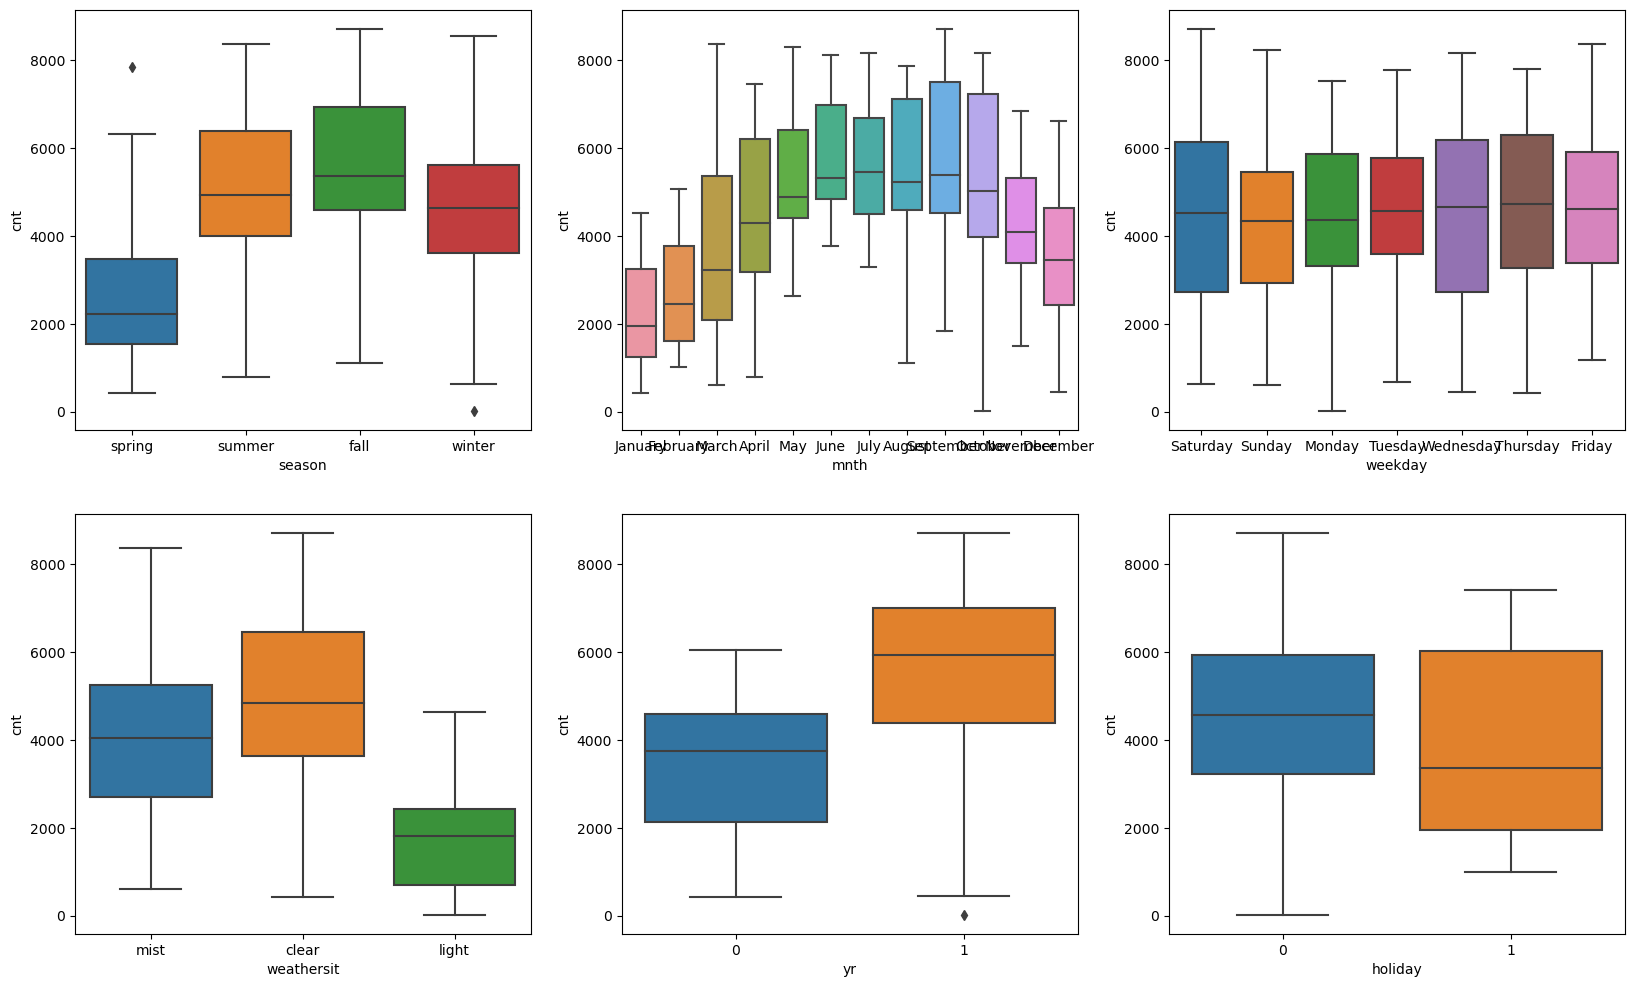

In [8]:
# Categorical data - (season,mnth,weekday,weathersit,yr,holiday,workingday)
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.show()

# we can observe difference median in most of the categorical data except weekday
# This indicates good predictor for the dependent variable

# Step 3: Data Preparation

## Dummy Variables
* Create dummy variable
* Drop first dummy variable for each set of dummies created

In [9]:
bike_sharing = pd.get_dummies(bike_sharing, drop_first=True)
bike_sharing.info()
bike_sharing.shape
bike_sharing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_spring      730 non-null    uint8  
 9   season_summer      730 non-null    uint8  
 10  season_winter      730 non-null    uint8  
 11  mnth_August        730 non-null    uint8  
 12  mnth_December      730 non-null    uint8  
 13  mnth_February      730 non-null    uint8  
 14  mnth_January       730 non-null    uint8  
 15  mnth_July          730 non-null    uint8  
 16  mnth_June          730 non

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting Data into Training and Testing Sets

In [10]:
# Split data Training - 70%, Testing - 30% 
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## Rescaling the Training Features

In [11]:
scaler = MinMaxScaler()

In [12]:
# Apply scaler() to all the columns except the categorical 'yes-no' and 'dummy' variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) 

df_train.head()
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


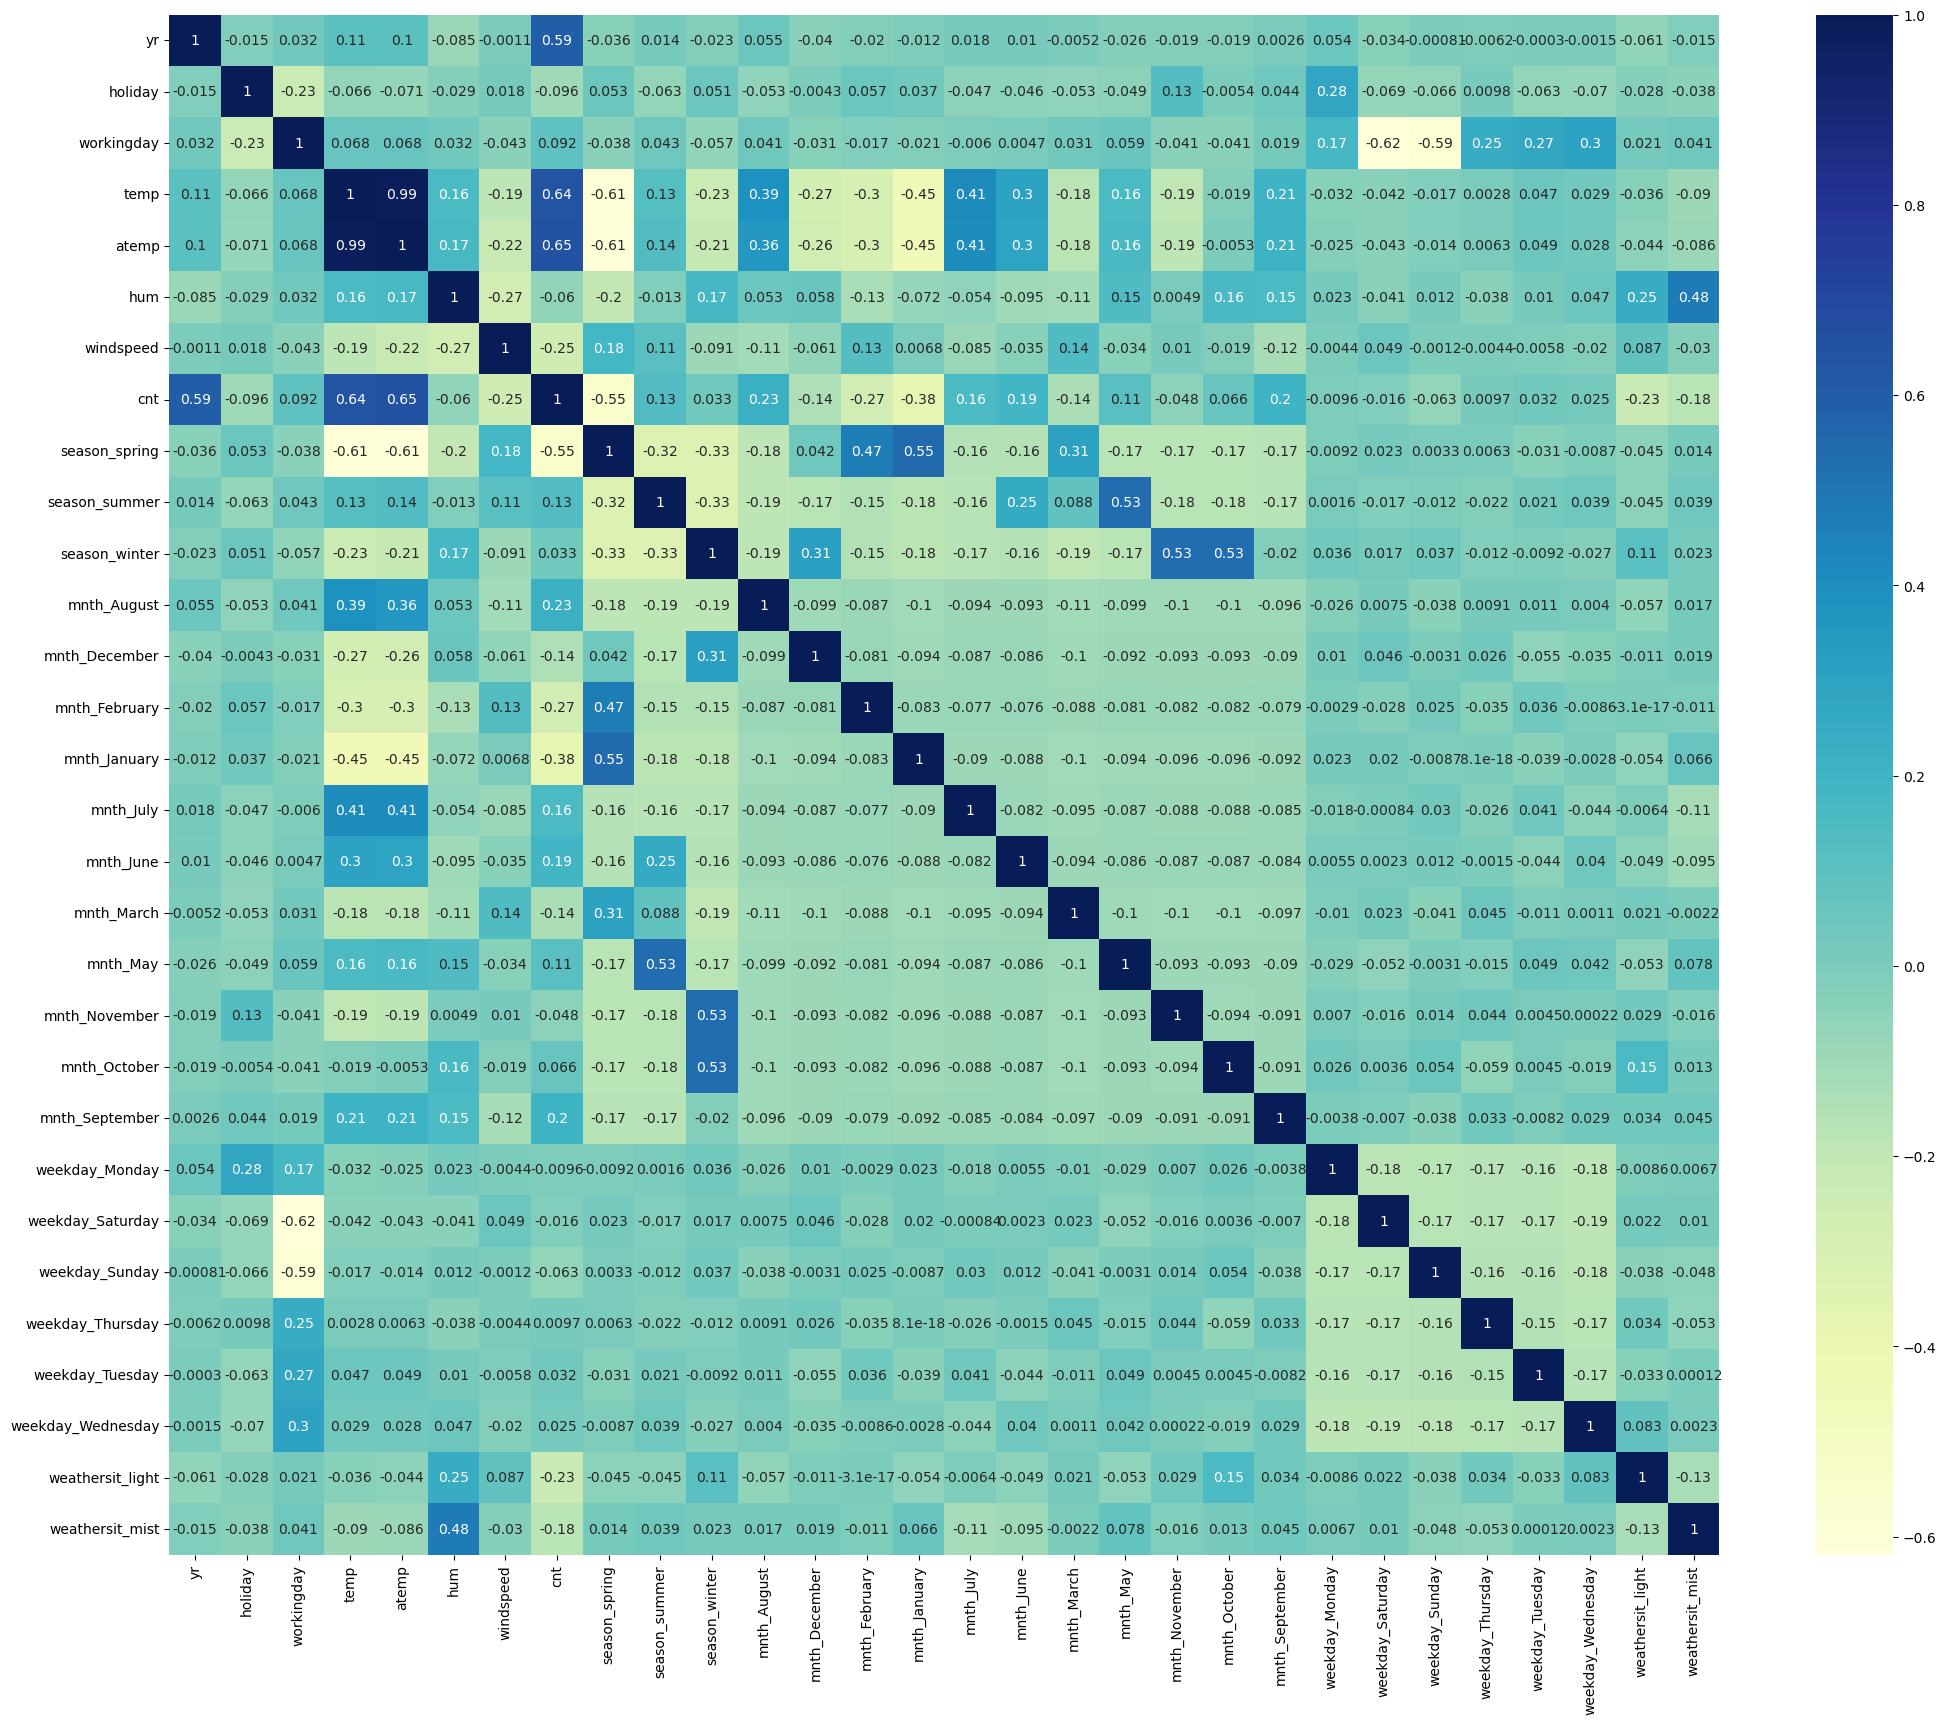

In [13]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Observation
# The heatmap shows multi colinear relations
# temp and atemp seems to be correlated with cnt

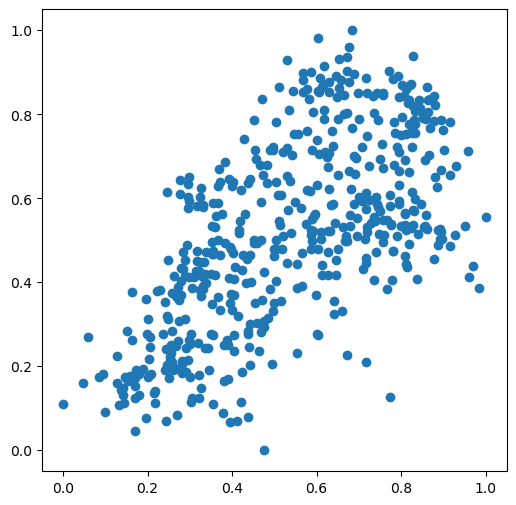

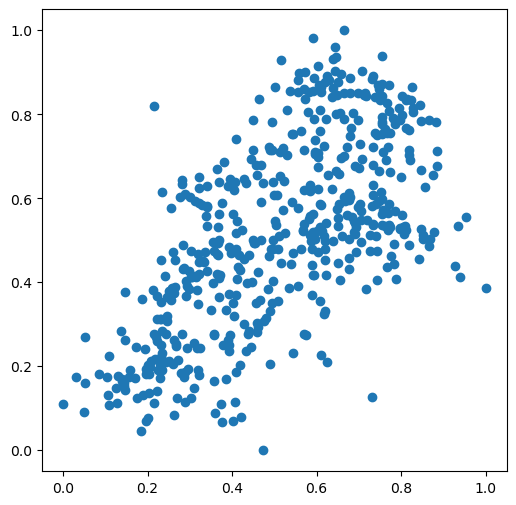

In [14]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

## Dividing into X and Y sets for the model building

In [15]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step5 : Building a Linear Model

## Recursive Feature Elimination - using RFE 

# Model1

In [16]:
# Running RFE - Output Variable = 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [17]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_August', False, 12),
 ('mnth_December', False, 8),
 ('mnth_February', False, 9),
 ('mnth_January', False, 6),
 ('mnth_July', True, 1),
 ('mnth_June', False, 19),
 ('mnth_March', False, 20),
 ('mnth_May', False, 11),
 ('mnth_November', False, 7),
 ('mnth_October', False, 16),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 14),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 13),
 ('weekday_Thursday', False, 17),
 ('weekday_Tuesday', False, 15),
 ('weekday_Wednesday', False, 18),
 ('weathersit_light', True, 1),
 ('weathersit_mist', False, 2)]

In [18]:
# Top 10 selected features
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_July', 'mnth_September', 'weathersit_light'],
      dtype='object')


In [19]:
# Not selected features
print(X_train.columns[~rfe.support_])

Index(['workingday', 'atemp', 'season_summer', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_mist'],
      dtype='object')


In [20]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_July,1.40
8,mnth_September,1.20
9,weathersit_light,1.11
1,holiday,1.04


In [21]:
# Train model using seleted features

rfe = rfe.fit(X_train[col], y_train)

# Calculate VIF
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_July,1.40
8,mnth_September,1.20
9,weathersit_light,1.11
1,holiday,1.04


# Building Model usig statsmodel, for the detailed statistics

# Model2

In [22]:
# Creating X_train dataframe with RFE selected variables
X_train_new = X_train[col]

X_train_model = sm.add_constant(X_train_new) # adding constant

lm = sm.OLS(y_train, X_train_model).fit() # Running the linear Model

print(lm.summary()) # statistics of the model

vif = pd.DataFrame() # Calculating VIF
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.53e-184
Time:                        20:10:58   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3769      0.031  

# Model3

In [23]:
# The VIF of hum is High >5 So dropping 
X_train_new = X_train_new.drop(["hum"], axis=1)

X_train_model = sm.add_constant(X_train_new) # adding constant

lm = sm.OLS(y_train, X_train_model).fit() # Running the linear Model

print(lm.summary()) # statistics of the model

vif = pd.DataFrame() # Calculating VIF
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)

print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.33e-171
Time:                        20:10:58   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2042      0.025  

# Residual Analysis of the train data

In [24]:
y_train_pred = lm.predict(X_train_model)

Text(0.5, 0, 'Errors')

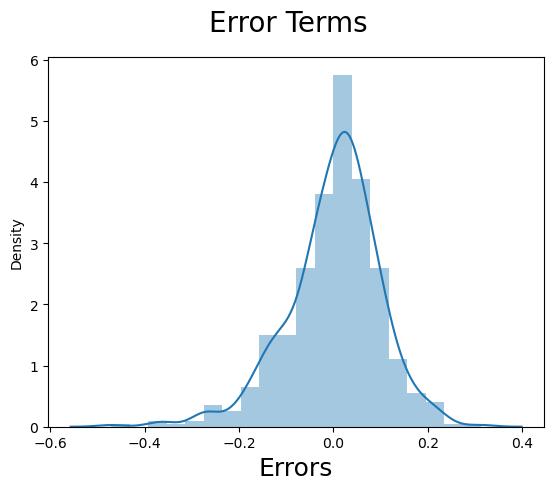

In [25]:
# Plot the histogram of the error terms 
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

# Making Predictions on Test data sets

In [26]:
# Applying the scaling on the tests sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [27]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [28]:
# Get the prediction from the model

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns] 

# Adding a constant variable
X_test_model = sm.add_constant(X_test_new)

In [29]:
# Making the Predictions
y_test_pred = lm.predict(X_test_model)

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

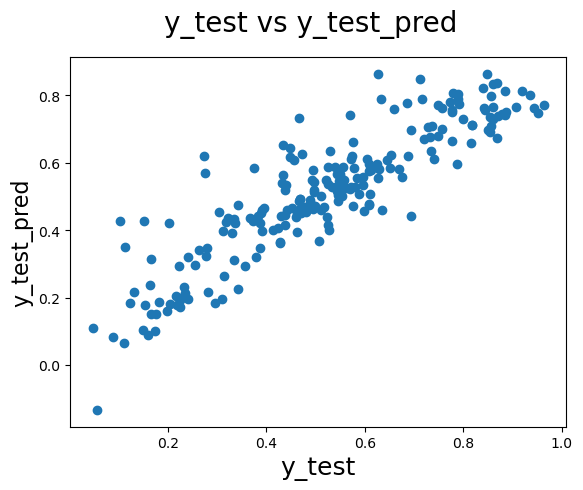

In [30]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label


In [31]:
print(X_test_new.shape[1])
print(lm.params)

9
const               0.204152
yr                  0.234993
holiday            -0.086151
temp                0.475763
windspeed          -0.132479
season_spring      -0.103199
season_winter       0.050374
mnth_July          -0.061646
mnth_September      0.049844
weathersit_light   -0.256213
dtype: float64


# The Equation from best fitted model is as below
cnt = 0.204152 + yr * 0.234993 - holiday * 0.086151 + temp * 0.475763 - windspeed * 0.132479- season_spring * 0.103199 + season_winter  * 0.050374 - mnth_July * 0.061646 + mnth_September * 0.049844 - weathersit_light * 0.256213

In [32]:
# n is number of rows in X
r2 = 0.817

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8091196172248803

In [33]:
## R-Squared score on train and test set

In [34]:
print('train r2 score ',r2_score(y_train, y_train_pred)) 
print('test r2 score ',r2_score(y_test, y_test_pred))

train r2 score  0.8046289610874561
test r2 score  0.7888115946045293
